<h2> Progetto SMM 21, rete di attori</h2>

<h5> Setto la chiave e importo la request</h5>

In [7]:
key = '350b6d51fb446e763dc2cd9c03a6b940'
import requests

<h5> Estraggo le prime 52 pagine degli attori più famosi</h5>

In [73]:
lista=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]
popolari=[]

for pagina in lista:
    p= str(pagina)
    response = requests.get("https://api.themoviedb.org/3/person/popular?api_key="+key+"&language=it&page="+p)
    dettagli = response.json()
    for attore in dettagli['results']:
        if(attore['known_for_department'] == 'Acting'):
            popolari.append(attore['id'])  
            
popolari = list(dict.fromkeys(popolari))
print(popolari)

[1245, 1252533, 1373737, 12835, 1734, 91606, 18918, 109513, 142115, 1991255, 13240, 5009, 10859, 2374721, 976, 1439922, 1522703, 2460109, 2564437, 5081, 1318905, 48, 73968, 3293, 62, 1894505, 142476, 204239, 1914924, 2963, 500, 58369, 51800, 1547061, 1166983, 3, 1944274, 505710, 25837, 3896, 18182, 1100, 31, 73457, 1468490, 1498646, 10431, 224513, 543261, 3223, 2524, 6384, 2231, 54693, 1954, 19537, 1907997, 14406, 234352, 287, 84205, 63312, 17271, 1951, 6193, 26291, 190, 117642, 9195, 63, 26723, 2472212, 887, 1475744, 2012560, 17832, 56734, 53252, 22226, 777, 8984, 90633, 1345419, 997644, 60898, 16644, 71580, 2071764, 17286, 2349944, 2133, 1705580, 7499, 9827, 72129, 17647, 85, 1183993, 543530, 35029, 776, 1231, 1949148, 6885, 98591, 86528, 1892, 2133990, 21657, 74568, 16483, 124644, 1590797, 78452, 6161, 1281, 4078, 1544093, 1946699, 2037, 2100002, 2025252, 955, 87819, 1327, 81685, 6858, 25130, 82809, 17628, 94098, 31838, 192, 18897, 107379, 56824, 3136, 968006, 3810, 33336, 882, 1091

<h5> prendo tutti i film di questi attori</h5>

In [9]:
import json
attori_film={}
for attore in popolari:    
    a= str(attore)
    response = requests.get("https://api.themoviedb.org/3/person/"+a+"/movie_credits?api_key="+key+"&language=it")
    dettagli = response.json()
    partecipazioni=[]   
    for films in dettagli['cast']:
            if('popularity' in films):
                if(films['popularity']>15):
                    partecipazioni.append(films['id'])
    attori_film[a] = partecipazioni
    
print(attori_film)

{'1245': [240832, 397422, 315837, 497698, 153, 74465, 100402, 152601, 138697, 1635, 492188, 259910, 271110, 515001, 438695, 1124, 10184, 10138, 335797, 24428, 99861, 212778, 278927, 299536, 448368, 299534, 11836, 448366, 9714, 399174, 299537, 284053], '1252533': [515195], '1373737': [410117, 445629, 530385, 331482, 497698, 454227, 399035], '12835': [10022, 7451, 47971, 87421, 168259, 274854, 385128, 385687, 337339, 338762, 755679, 10386, 118340, 283995, 447365, 857, 616037, 299536, 404368, 299534, 259910], '1734': [150], '91606': [293167, 846214, 57212, 284053, 10195, 76338, 175112, 201085, 448363, 24428, 453395, 59436, 299536, 299534, 259910], '18918': [10159, 11358, 23023, 9334, 13680, 41283, 16866, 72545, 134411, 184315, 427641, 451048, 302699, 339846, 254128, 353486, 72559, 447200, 384018, 512200, 134374, 169209, 277834, 11665, 168259, 337339, 445629, 1734, 27581, 550988], '109513': [76617, 339404, 537739, 254128, 433310, 481879, 618354, 32657, 76285, 330483, 339846, 48988, 721625,

<h5> Rimovo gli attori che non hanno nemmeno un film</h5>

In [10]:
attori_film2= attori_film.copy()
for check in attori_film:    
    a = len(attori_film.get(check))
    if a < 1 :
        attori_film2.pop(check, None)
print(attori_film2)

{'1245': [240832, 397422, 315837, 497698, 153, 74465, 100402, 152601, 138697, 1635, 492188, 259910, 271110, 515001, 438695, 1124, 10184, 10138, 335797, 24428, 99861, 212778, 278927, 299536, 448368, 299534, 11836, 448366, 9714, 399174, 299537, 284053], '1252533': [515195], '1373737': [410117, 445629, 530385, 331482, 497698, 454227, 399035], '12835': [10022, 7451, 47971, 87421, 168259, 274854, 385128, 385687, 337339, 338762, 755679, 10386, 118340, 283995, 447365, 857, 616037, 299536, 404368, 299534, 259910], '1734': [150], '91606': [293167, 846214, 57212, 284053, 10195, 76338, 175112, 201085, 448363, 24428, 453395, 59436, 299536, 299534, 259910], '18918': [10159, 11358, 23023, 9334, 13680, 41283, 16866, 72545, 134411, 184315, 427641, 451048, 302699, 339846, 254128, 353486, 72559, 447200, 384018, 512200, 134374, 169209, 277834, 11665, 168259, 337339, 445629, 1734, 27581, 550988], '109513': [76617, 339404, 537739, 254128, 433310, 481879, 618354, 32657, 76285, 330483, 339846, 48988, 721625,

<h5>Associo un nome agli id degli attori</h5>

In [133]:
pop={}
attori_film3={}
for attore in attori_film2:
    attore= str(attore)
    response = requests.get("https://api.themoviedb.org/3/person/"+attore+"?api_key="+key+"&language=it")
    dettagli = response.json()
    attori_film3[dettagli['name']]= attori_film2.get(attore)
    pop[dettagli['name']] = int(dettagli['popularity'])
    
print(attori_film3)
print(pop)

{'Scarlett Johansson': [240832, 397422, 315837, 497698, 153, 74465, 100402, 152601, 138697, 1635, 492188, 259910, 271110, 515001, 438695, 1124, 10184, 10138, 335797, 24428, 99861, 212778, 278927, 299536, 448368, 299534, 11836, 448366, 9714, 399174, 299537, 284053], 'Sophia Di Martino': [515195], 'Florence Pugh': [410117, 445629, 530385, 331482, 497698, 454227, 399035], 'Vin Diesel': [10022, 7451, 47971, 87421, 168259, 274854, 385128, 385687, 337339, 338762, 755679, 10386, 118340, 283995, 447365, 857, 616037, 299536, 404368, 299534, 259910], "Annette O'Toole": [150], 'Tom Hiddleston': [293167, 846214, 57212, 284053, 10195, 76338, 175112, 201085, 448363, 24428, 453395, 59436, 299536, 299534, 259910], 'Dwayne Johnson': [10159, 11358, 23023, 9334, 13680, 41283, 16866, 72545, 134411, 184315, 427641, 451048, 302699, 339846, 254128, 353486, 72559, 447200, 384018, 512200, 134374, 169209, 277834, 11665, 168259, 337339, 445629, 1734, 27581, 550988], 'Alexandra Daddario': [76617, 339404, 537739, 

<h5> Creo un nuovo dictionary nel quale associo ad ogni attore un dictionary di attori che hanno collaborato con lui</h5>

In [12]:
schema={}
trovato={}
for attore1 in attori_film3:
    for film in attori_film3.get(attore1):             
        for attore2 in attori_film3:   
            if film in attori_film3.get(attore2) and attore1 != attore2:            
                if attore2 in trovato:
                    trovato[attore2] += 1
                else:
                     trovato[attore2] = 1
    schema[attore1]= trovato
    trovato={}
print(schema)

{'Scarlett Johansson': {'Lio Tipton': 1, 'Morgan Freeman': 1, 'Zoë Kravitz': 1, 'Michael Pitt': 1, 'Florence Pugh': 1, 'Rachel Weisz': 1, 'Olga Kurylenko': 1, 'David Harbour': 1, 'Ray Winstone': 1, 'Ever Anderson': 1, 'Jeremy Renner': 7, 'Matt Damon': 2, 'Elle Fanning': 1, 'Samuel L. Jackson': 10, 'Sebastian Stan': 5, 'Frank Grillo': 3, 'Hayley Atwell': 4, 'Chris Evans': 9, 'Cobie Smulders': 5, 'Elizabeth Olsen': 5, 'Anthony Mackie': 6, 'Aaron Taylor-Johnson': 2, 'Thomas Kretschmann': 2, 'Chris Pratt': 4, 'Kristen Wiig': 1, 'Amy Adams': 1, 'Olivia Wilde': 1, 'Joaquin Phoenix': 1, 'Julianne Moore': 1, 'Anne Hathaway': 1, 'Brie Larson': 3, 'Channing Tatum': 1, 'Sean Bean': 1, 'Ewan McGregor': 1, 'Steve Buscemi': 1, 'Shawnee Smith': 1, 'Ray Liotta': 1, 'Adam Driver': 1, 'Vin Diesel': 3, 'Tom Hiddleston': 5, 'Robert Downey Jr.': 9, 'Chris Hemsworth': 6, 'Jon Favreau': 5, 'Kenneth Branagh': 2, 'Paul Rudd': 2, 'Tom Holland': 3, 'Don Cheadle': 6, 'Kerry Condon': 4, 'Marisa Tomei': 2, 'Chadwic

In [210]:
print(len(schema['Josh Brolin']))

107


<h5> Ora creo i links tra l'attore e tutti quelli nel suo array</h5>

In [18]:
links={}
for attore in schema:
    for attore2 in schema.get(attore):
        chiave = attore+"-->"+attore2
        valore = schema.get(attore).get(attore2)
        links[chiave]=valore
print(links)

{'Scarlett Johansson-->Lio Tipton': 1, 'Scarlett Johansson-->Morgan Freeman': 1, 'Scarlett Johansson-->Zoë Kravitz': 1, 'Scarlett Johansson-->Michael Pitt': 1, 'Scarlett Johansson-->Florence Pugh': 1, 'Scarlett Johansson-->Rachel Weisz': 1, 'Scarlett Johansson-->Olga Kurylenko': 1, 'Scarlett Johansson-->David Harbour': 1, 'Scarlett Johansson-->Ray Winstone': 1, 'Scarlett Johansson-->Ever Anderson': 1, 'Scarlett Johansson-->Jeremy Renner': 7, 'Scarlett Johansson-->Matt Damon': 2, 'Scarlett Johansson-->Elle Fanning': 1, 'Scarlett Johansson-->Samuel L. Jackson': 10, 'Scarlett Johansson-->Sebastian Stan': 5, 'Scarlett Johansson-->Frank Grillo': 3, 'Scarlett Johansson-->Hayley Atwell': 4, 'Scarlett Johansson-->Chris Evans': 9, 'Scarlett Johansson-->Cobie Smulders': 5, 'Scarlett Johansson-->Elizabeth Olsen': 5, 'Scarlett Johansson-->Anthony Mackie': 6, 'Scarlett Johansson-->Aaron Taylor-Johnson': 2, 'Scarlett Johansson-->Thomas Kretschmann': 2, 'Scarlett Johansson-->Chris Pratt': 4, 'Scarlet

<h4> Importo tutto il necessario per utilizzare networkX</h4>

In [14]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h5>Ora creo un solo array che contiene tutti gli attori, lo uso per inserire tutti i nodi nel grafo</h5>

In [106]:
soloAttori=[]
for attore in attori_film3:
    soloAttori.append(attore)
print(soloAttori)


['Scarlett Johansson', 'Sophia Di Martino', 'Florence Pugh', 'Vin Diesel', "Annette O'Toole", 'Tom Hiddleston', 'Dwayne Johnson', 'Alexandra Daddario', 'Kiana Madeira', 'Mark Wahlberg', 'Peter Benson', 'Ryan Reynolds', 'Han Seo-ah', 'Jason Statham', 'Emily Blunt', 'Lyubov Aksyonova', 'Sean Bean', 'Henry Cavill', 'Rachel Weisz', 'Bruce Willis', 'Nicolas Cage', 'Tom Cruise', 'Alexandra Breckenridge', 'Teryl Rothery', 'Olivia Scott Welch', 'Harrison Ford', 'Drew Scheid', 'Zendaya', 'Elisha Cuthbert', 'Liam Neeson', 'Olga Kurylenko', 'Arnold Schwarzenegger', 'Tom Hanks', 'Chris Pratt', 'Baek Da-eun', 'Sarah Dugdale', 'Jennifer Jason Leigh', 'Ana de Armas', 'Karen Gillan', 'Robert Downey Jr.', 'Tom Hardy', 'Keanu Reeves', 'Samuel L. Jackson', 'Emma Stone', 'Billy Zane', 'Megan Fox', 'Min Do-yoon', 'Lisa Kudrow', 'Margot Robbie', 'Brad Pitt', 'Yvonne Strahovski', 'Brandon Routh', 'Elisabeth Shue', 'Leonardo DiCaprio', 'Martin Henderson', 'Clint Eastwood', 'Jason Momoa', 'Hiroyuki Sanada', 'M

<h5> Dichiaro il grafo, ci aggiungo gli attori e i link tra di essi</h5>

In [134]:

grafo = nx.Graph()
for attore in pop:
    grafo.add_node(attore, popolarità=pop.get(attore))


In [135]:
for chiave in links:
    stringa= chiave.split("-->")
    peso=links.get(chiave)
    grafo.add_edge(stringa[0],stringa[1],weight=peso/2)

<h5> Stampo il numero di nodi e il numero di archi del mio grafo</h5>

In [136]:
print("numero di nodi:"+str(grafo.order()))
print("Numero di archi :"+str(grafo.size()))

numero di nodi:874
Numero di archi :10649


<h3>Marvel vs DC</h3>

<h5> Cerco gli attori che sono comparsi almeno in un film DC o MARVEL</h5>

In [140]:
attore_specie={}
attori_specie={}
for attore in attori_film2:
    for film in attori_film2.get(attore):
        film= str(film)
        response = requests.get("https://api.themoviedb.org/3/movie/"+film+"?api_key="+key+"&language=it")
        dettagli = response.json()
        for produzioni in dettagli['production_companies']:
            if(produzioni['id'])==429:
                if produzioni['id'] in attore_specie:
                    attore_specie[429] += 1
                else:
                    attore_specie[429] = 1
            elif (produzioni['id'])==420:
                 if produzioni['id'] in attore_specie:
                    attore_specie[420] += 1
                 else:
                    attore_specie[420] = 1
    
    attori_specie[attore]= attore_specie
    attore_specie={}

print(attori_specie)

{'1245': {420: 11}, '1252533': {}, '1373737': {420: 1}, '12835': {420: 7}, '1734': {}, '91606': {420: 8}, '18918': {}, '109513': {}, '142115': {}, '13240': {}, '5009': {}, '10859': {420: 1}, '2374721': {}, '976': {}, '5081': {}, '1318905': {}, '48': {}, '73968': {429: 4}, '3293': {429: 1, 420: 1}, '62': {429: 2}, '2963': {420: 1, 429: 1}, '500': {}, '58369': {}, '51800': {}, '1547061': {}, '3': {}, '1944274': {}, '505710': {420: 3}, '25837': {}, '3896': {429: 1}, '18182': {420: 1}, '1100': {429: 1}, '31': {}, '73457': {420: 7}, '1468490': {}, '1498646': {}, '10431': {}, '224513': {}, '543261': {420: 6}, '3223': {420: 12}, '2524': {}, '6384': {429: 1}, '2231': {420: 12}, '54693': {}, '1954': {}, '19537': {}, '1907997': {}, '14406': {}, '234352': {429: 3}, '287': {}, '63312': {429: 1}, '17271': {429: 1}, '1951': {}, '6193': {}, '26291': {}, '190': {}, '117642': {429: 5}, '9195': {420: 1}, '63': {}, '26723': {}, '887': {}, '1475744': {}, '17832': {429: 4}, '56734': {}, '53252': {}, '22226

<h5> Rimuovo quelli che non hanno nessun film</h5>

In [242]:
attori_specie2= attori_specie.copy()
for check in attori_specie:    
    a = len(attori_specie.get(check))
    if a < 1 :
        attori_specie2.pop(check, None)
print(attori_specie2)

{'1245': {420: 11}, '1373737': {420: 1}, '12835': {420: 7}, '91606': {420: 8}, '10859': {420: 1}, '73968': {429: 4}, '3293': {429: 1, 420: 1}, '62': {429: 2}, '2963': {420: 1, 429: 1}, '505710': {420: 3}, '3896': {429: 1}, '18182': {420: 1}, '1100': {429: 1}, '73457': {420: 7}, '543261': {420: 6}, '3223': {420: 12}, '6384': {429: 1}, '2231': {420: 12}, '234352': {429: 3}, '63312': {429: 1}, '17271': {429: 1}, '117642': {429: 5}, '9195': {420: 1}, '17832': {429: 4}, '22226': {420: 5}, '90633': {429: 5}, '60898': {420: 8}, '16644': {429: 1}, '71580': {420: 6}, '7499': {429: 2}, '543530': {420: 6}, '35029': {420: 1, 429: 1}, '1892': {420: 2}, '74568': {420: 11}, '16483': {429: 1, 420: 1}, '6161': {420: 1}, '2037': {429: 2}, '81685': {420: 3}, '17628': {429: 1}, '192': {429: 3}, '3136': {420: 1}, '882': {420: 1}, '16940': {429: 3}, '11006': {429: 1}, '15762': {429: 12}, '1136406': {420: 6}, '78110': {420: 1}, '13275': {420: 3}, '1896': {420: 7}, '7497': {429: 2}, '39459': {420: 7}, '2888':

In [241]:
attori_marvel_dc={}
for attore in attori_specie2:
    for attore2 in attori_film2:
        if attore== attore2:
            attori_marvel_dc[attore] = attori_film2.get(attore2)
print(attori_marvel_dc)

{'1245': [240832, 397422, 315837, 497698, 153, 74465, 100402, 152601, 138697, 1635, 492188, 259910, 271110, 515001, 438695, 1124, 10184, 10138, 335797, 24428, 99861, 212778, 278927, 299536, 448368, 299534, 11836, 448366, 9714, 399174, 299537, 284053], '1373737': [410117, 445629, 530385, 331482, 497698, 454227, 399035], '12835': [10022, 7451, 47971, 87421, 168259, 274854, 385128, 385687, 337339, 338762, 755679, 10386, 118340, 283995, 447365, 857, 616037, 299536, 404368, 299534, 259910], '91606': [293167, 846214, 57212, 284053, 10195, 76338, 175112, 201085, 448363, 24428, 453395, 59436, 299536, 299534, 259910], '10859': [10065, 11452, 44912, 77950, 238615, 293660, 383498, 390043, 509967, 550988, 567604, 522931, 18240, 49524, 49519, 49520, 558144, 533535, 36648, 395992, 529203, 11282, 447404, 384018, 72105, 188161], '73968': [37958, 49521, 203801, 209112, 141052, 353081, 497582, 791373, 390054, 12699, 2270, 11362], '3293': [402298, 413998, 419743, 561, 564, 1734, 49040, 853, 7980, 68728, 

<h5> Faccio uno schema tra gli attori che rimangono</h5>

In [143]:
schema2={}
trovato2={}
for attore1 in attori_marvel_dc:
    for film in attori_marvel_dc.get(attore1):    
         
        for attore2 in attori_marvel_dc:   
            if film in attori_marvel_dc.get(attore2) and attore1 != attore2:
               
                if attore2 in trovato2:
                    trovato2[attore2] += 1
                else:
                     trovato2[attore2] = 1
    schema2[attore1]= trovato2
    trovato2={}

print(schema2)

{'1245': {'192': 1, '37153': 1, '1373737': 1, '3293': 1, '18182': 1, '35029': 1, '5538': 1, '1743933': 1, '17604': 7, '1892': 2, '2231': 10, '60898': 5, '81685': 3, '39459': 4, '16828': 9, '71189': 5, '550843': 5, '53650': 6, '27428': 2, '3491': 2, '73457': 4, '41091': 1, '9273': 1, '73421': 1, '60073': 3, '3061': 1, '12835': 3, '91606': 5, '3223': 9, '74568': 6, '15277': 5, '11181': 2, '22226': 2, '1136406': 3, '1896': 6, '62105': 4, '3141': 2, '172069': 3, '3894': 1, '3895': 1, '1333': 2, '6161': 1, '880': 1, '69597': 1, '64154': 1, '57451': 1, '15762': 1, '34486': 1, '13548': 1, '1817': 2, '17605': 4, '16851': 3, '4690': 1, '2282': 1, '543261': 2, '71580': 3, '543530': 2, '8691': 2, '139820': 2, '1121': 1, '236696': 2, '9195': 1, '524': 1, '19034': 1, '62561': 2, '1160': 1, '3063': 2, '6574': 2, '28238': 1, '4785': 2, '819': 1, '9642': 1, '13275': 1, '4783': 1, '4173': 1, '1372': 1, '112': 1, '56614': 1}, '1373737': {'8399': 1, '56446': 1, '1245': 1, '3293': 1, '18182': 1, '35029': 

<h5> Creo anche i link e la lista dei nodi</h5>

In [144]:
links2={}
for attore in schema2:
    for attore2 in schema2.get(attore):
        chiave = attore+"-->"+attore2
        valore = schema2.get(attore).get(attore2)
        links2[chiave]=valore
print(links2)

{'1245-->192': 1, '1245-->37153': 1, '1245-->1373737': 1, '1245-->3293': 1, '1245-->18182': 1, '1245-->35029': 1, '1245-->5538': 1, '1245-->1743933': 1, '1245-->17604': 7, '1245-->1892': 2, '1245-->2231': 10, '1245-->60898': 5, '1245-->81685': 3, '1245-->39459': 4, '1245-->16828': 9, '1245-->71189': 5, '1245-->550843': 5, '1245-->53650': 6, '1245-->27428': 2, '1245-->3491': 2, '1245-->73457': 4, '1245-->41091': 1, '1245-->9273': 1, '1245-->73421': 1, '1245-->60073': 3, '1245-->3061': 1, '1245-->12835': 3, '1245-->91606': 5, '1245-->3223': 9, '1245-->74568': 6, '1245-->15277': 5, '1245-->11181': 2, '1245-->22226': 2, '1245-->1136406': 3, '1245-->1896': 6, '1245-->62105': 4, '1245-->3141': 2, '1245-->172069': 3, '1245-->3894': 1, '1245-->3895': 1, '1245-->1333': 2, '1245-->6161': 1, '1245-->880': 1, '1245-->69597': 1, '1245-->64154': 1, '1245-->57451': 1, '1245-->15762': 1, '1245-->34486': 1, '1245-->13548': 1, '1245-->1817': 2, '1245-->17605': 4, '1245-->16851': 3, '1245-->4690': 1, '12

In [145]:
soloAttori2=[]
for attore in attori_marvel_dc:
    soloAttori2.append(attore)
print(len(attori_marvel_dc))

224


<h5> Aggiungo ad un nuovo grafo il i nodi e i link</h5>

In [146]:
grafo2 = nx.Graph()
grafo2.add_nodes_from(soloAttori2)

In [147]:
for chiave in links2:
    stringa= chiave.split("-->")
    peso=links2.get(chiave)
    grafo2.add_edge(stringa[0],stringa[1],weight=peso/2)

In [148]:
grafo2.size()

2964

In [149]:
import operator
attori_classe={}
for attore in attori_specie2:
        max_key = max(attori_specie2.get(attore), key=attori_specie2.get(attore).get)
        attori_classe[attore]=max_key              
print(attori_classe)

{'1245': 420, '1373737': 420, '12835': 420, '91606': 420, '10859': 420, '73968': 429, '3293': 429, '62': 429, '2963': 420, '505710': 420, '3896': 429, '18182': 420, '1100': 429, '73457': 420, '543261': 420, '3223': 420, '6384': 429, '2231': 420, '234352': 429, '63312': 429, '17271': 429, '117642': 429, '9195': 420, '17832': 429, '22226': 420, '90633': 429, '60898': 420, '16644': 429, '71580': 420, '7499': 429, '543530': 420, '35029': 420, '1892': 420, '74568': 420, '16483': 429, '6161': 420, '2037': 429, '81685': 420, '17628': 429, '192': 429, '3136': 420, '882': 420, '16940': 429, '11006': 429, '15762': 429, '1136406': 420, '78110': 420, '13275': 420, '1896': 420, '7497': 429, '39459': 420, '2888': 429, '1019': 420, '9281': 420, '74242': 429, '64856': 429, '55085': 429, '13548': 420, '41091': 429, '1253360': 429, '16828': 420, '524': 420, '8691': 420, '9273': 429, '56152': 429, '37696': 429, '20089': 429, '140114': 429, '1289968': 429, '880': 429, '18702': 429, '5293': 429, '64': 429,

In [150]:
grafo2 = nx.Graph()
grafo2.clear()
for nodo in attori_classe:
    grafo2.add_node(nodo, tipo=attori_classe.get(nodo))

In [151]:
for chiave in links2:
    stringa= chiave.split("-->")
    peso=links2.get(chiave)
    grafo2.add_edge(stringa[0],stringa[1],weight=peso/2)

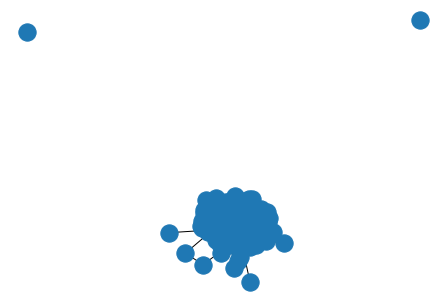

In [152]:
nx.draw(grafo2)

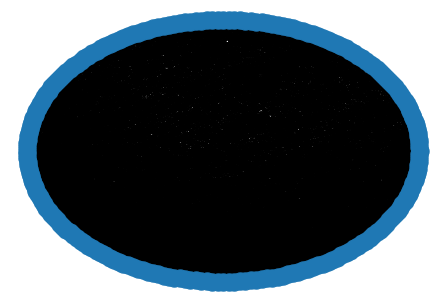

In [153]:
posizione = nx.shell_layout(grafo2)
nx.draw(grafo2, pos = posizione)

<h1 style="color:red"> Ora faccio gli studi sui 2 grafi, parto dal primo</h1>

<h5> Trovo il grado massimo e il minimo del grafo</h5>

In [21]:
campione_grado = list(dict(grafo.degree()).values())
grado_max=np.max(campione_grado)
grado_min=np.min(campione_grado)
print(grado_max)
print(grado_min)

162
0


<h5> Grado medio </h5>

In [121]:
grado_medio=np.mean(campione_grado)
print(grado_medio)


list(grafo.nodes(data=True))

24.36842105263158


[('Scarlett Johansson', {}),
 ('Lio Tipton', {}),
 ('Morgan Freeman', {}),
 ('Zoë Kravitz', {}),
 ('Michael Pitt', {}),
 ('Florence Pugh', {}),
 ('Rachel Weisz', {}),
 ('Olga Kurylenko', {}),
 ('David Harbour', {}),
 ('Ray Winstone', {}),
 ('Ever Anderson', {}),
 ('Jeremy Renner', {}),
 ('Matt Damon', {}),
 ('Elle Fanning', {}),
 ('Samuel L. Jackson', {}),
 ('Sebastian Stan', {}),
 ('Frank Grillo', {}),
 ('Hayley Atwell', {}),
 ('Chris Evans', {}),
 ('Cobie Smulders', {}),
 ('Elizabeth Olsen', {}),
 ('Anthony Mackie', {}),
 ('Aaron Taylor-Johnson', {}),
 ('Thomas Kretschmann', {}),
 ('Chris Pratt', {}),
 ('Kristen Wiig', {}),
 ('Amy Adams', {}),
 ('Olivia Wilde', {}),
 ('Joaquin Phoenix', {}),
 ('Julianne Moore', {}),
 ('Anne Hathaway', {}),
 ('Brie Larson', {}),
 ('Channing Tatum', {}),
 ('Sean Bean', {}),
 ('Ewan McGregor', {}),
 ('Steve Buscemi', {}),
 ('Shawnee Smith', {}),
 ('Ray Liotta', {}),
 ('Adam Driver', {}),
 ('Vin Diesel', {}),
 ('Tom Hiddleston', {}),
 ('Robert Downey Jr.

<h5> Moda e mediana</h5>

In [23]:
import scipy.stats as sp
mediana=np.median(campione_grado)
moda=sp.mode(campione_grado).mode[0]
print(mediana)
print(moda)

17.0
1


In [24]:
grado_min = min(campione_grado)
grado_max = max(campione_grado)
count_grado, bins_grado = np.histogram(campione_grado,
                                        bins = np.arange(grado_min,grado_max+2))
dict(zip(bins_grado,count_grado))

{0: 43,
 1: 47,
 2: 32,
 3: 26,
 4: 23,
 5: 26,
 6: 25,
 7: 26,
 8: 22,
 9: 24,
 10: 28,
 11: 18,
 12: 16,
 13: 21,
 14: 10,
 15: 22,
 16: 17,
 17: 12,
 18: 14,
 19: 19,
 20: 11,
 21: 18,
 22: 9,
 23: 14,
 24: 12,
 25: 11,
 26: 15,
 27: 11,
 28: 15,
 29: 14,
 30: 14,
 31: 8,
 32: 7,
 33: 11,
 34: 7,
 35: 8,
 36: 5,
 37: 9,
 38: 7,
 39: 5,
 40: 5,
 41: 6,
 42: 2,
 43: 5,
 44: 4,
 45: 4,
 46: 9,
 47: 5,
 48: 8,
 49: 8,
 50: 7,
 51: 9,
 52: 3,
 53: 3,
 54: 5,
 55: 9,
 56: 3,
 57: 2,
 58: 2,
 59: 7,
 60: 8,
 61: 4,
 62: 6,
 63: 2,
 64: 2,
 65: 6,
 66: 5,
 67: 3,
 68: 2,
 69: 2,
 70: 4,
 71: 2,
 72: 3,
 73: 3,
 74: 1,
 75: 1,
 76: 5,
 77: 1,
 78: 0,
 79: 2,
 80: 1,
 81: 3,
 82: 0,
 83: 1,
 84: 2,
 85: 2,
 86: 1,
 87: 0,
 88: 1,
 89: 0,
 90: 0,
 91: 1,
 92: 0,
 93: 1,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 2,
 99: 0,
 100: 1,
 101: 1,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 1,
 107: 1,
 108: 0,
 109: 0,
 110: 1,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 1,
 119: 0,

In [25]:
pdf_grado = count_grado / grafo.order()
print(pdf_grado)
np.sum(pdf_grado)

[0.04919908 0.05377574 0.03661327 0.02974828 0.02631579 0.02974828
 0.02860412 0.02974828 0.02517162 0.02745995 0.03203661 0.02059497
 0.01830664 0.02402746 0.01144165 0.02517162 0.0194508  0.01372998
 0.01601831 0.02173913 0.01258581 0.02059497 0.01029748 0.01601831
 0.01372998 0.01258581 0.01716247 0.01258581 0.01716247 0.01601831
 0.01601831 0.00915332 0.00800915 0.01258581 0.00800915 0.00915332
 0.00572082 0.01029748 0.00800915 0.00572082 0.00572082 0.00686499
 0.00228833 0.00572082 0.00457666 0.00457666 0.01029748 0.00572082
 0.00915332 0.00915332 0.00800915 0.01029748 0.00343249 0.00343249
 0.00572082 0.01029748 0.00343249 0.00228833 0.00228833 0.00800915
 0.00915332 0.00457666 0.00686499 0.00228833 0.00228833 0.00686499
 0.00572082 0.00343249 0.00228833 0.00228833 0.00457666 0.00228833
 0.00343249 0.00343249 0.00114416 0.00114416 0.00572082 0.00114416
 0.         0.00228833 0.00114416 0.00343249 0.         0.00114416
 0.00228833 0.00228833 0.00114416 0.         0.00114416 0.
 0.

1.0

Text(0, 0.5, 'PDF')

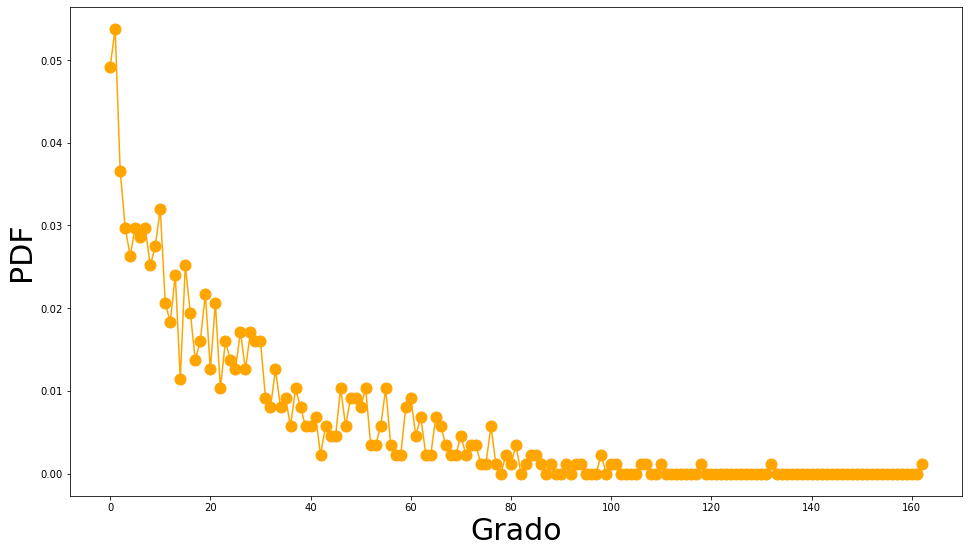

In [27]:
fig = plt.figure(figsize=(16,9))
assi = fig.gca()
assi.plot(bins_grado[:-1],pdf_grado, color='orange',marker='o', linestyle='-', ms=11)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('PDF',size=30)

Text(0, 0.5, 'CDF $P(X\\leq x)$')

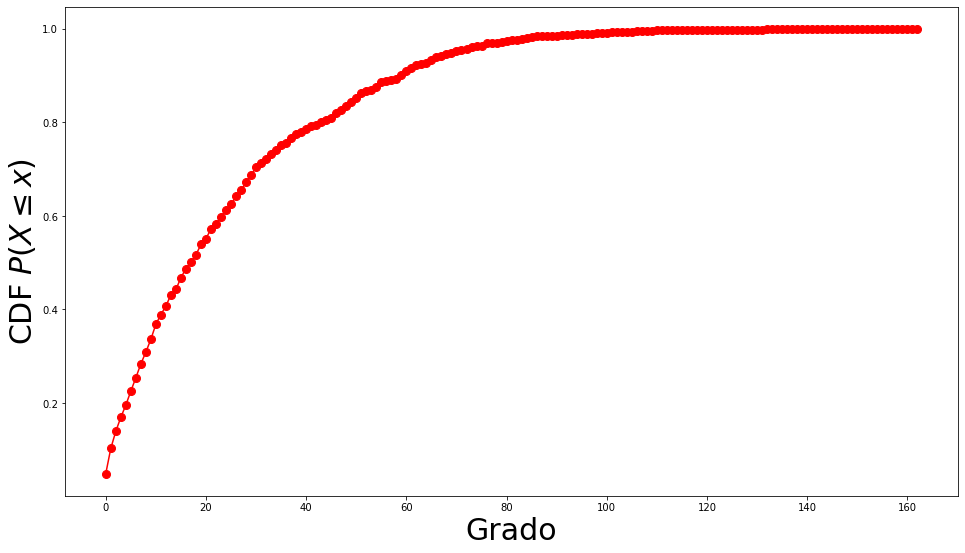

In [28]:
cdf_grado=np.cumsum(pdf_grado)
fig_cdf_grado = plt.figure(figsize=(16,9))
assi = fig_cdf_grado.gca()
assi.plot(bins_grado[:-1], cdf_grado, color = 'red', marker = 'o', linestyle = '-', ms = 8)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('CDF $P(X\leq x)$',size=30)

<h3> Confronto con erdos reyni</h3>

In [29]:
grado_medio = np.mean(campione_grado)
print(grado_medio)

24.36842105263158


In [30]:
p = grado_medio / (grafo.order()-1)
print(p)

0.027913426177126666


In [31]:
random_graph = nx.fast_gnp_random_graph(grafo.order(),p)

In [32]:
print('Numero nodi: {}'.format(random_graph.order()))
print('Numero archi: {}'.format(random_graph.size()))

Numero nodi: 874
Numero archi: 10750


In [33]:
rand_degree = list(dict(random_graph.degree()).values())
count_rand, bins_rand = np.histogram(rand_degree,bins=np.arange(min(rand_degree),max(rand_degree)+2))

In [34]:
pdf_rand = count_rand / random_graph.order()

In [35]:
count_rand.shape, bins_rand[:,].shape, pdf_rand.shape

((34,), (35,), (34,))

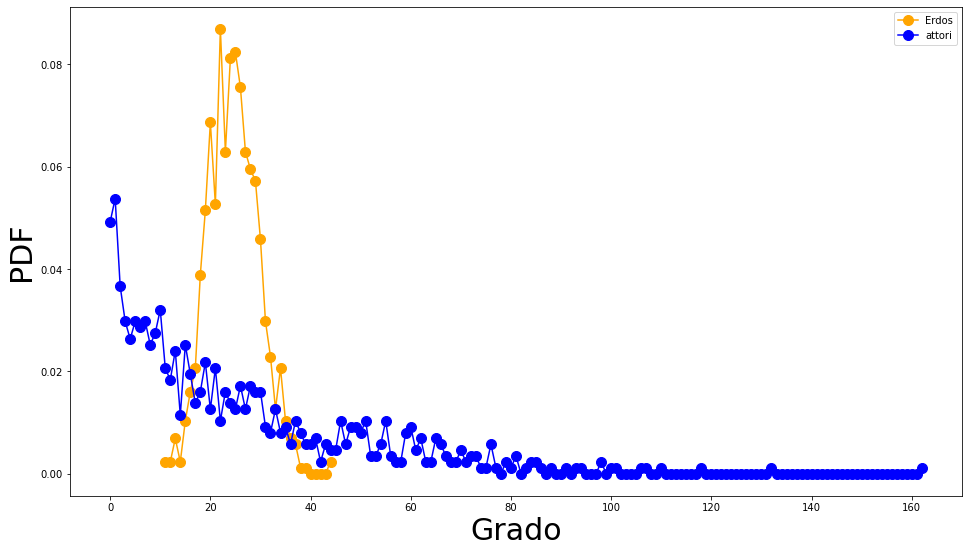

In [38]:
fig = plt.figure(figsize=(16,9))
assi = fig.gca()
assi.plot(bins_rand[:-1],pdf_rand, color = 'orange', linestyle='-', marker='o', ms=10, label='Erdos')
assi.plot(bins_grado[:-1],pdf_grado, color = 'blue', linestyle='-', marker='o', ms=10, label='attori')
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('PDF',size=30)
assi.legend(loc='upper right')

<h4> Seconde prove</h4>

In [206]:
percentile_95 = np.percentile(campione_grado,99.9)
print(percentile_95)

88.1010000000002


In [207]:
hub_nodi = [k for k,v in dict(grafo.degree()).items() if v>= percentile_95]

In [208]:
hub_nodi[]

['Scarlett Johansson',
 'Vin Diesel',
 'Bruce Willis',
 'Liam Neeson',
 'Chris Pratt',
 'Samuel L. Jackson',
 'Brad Pitt',
 'Dave Bautista',
 'Matt Damon',
 'Chris Hemsworth',
 'Gary Oldman',
 'Idris Elba',
 'Josh Brolin']

In [56]:
eigen_con_pesi = nx.eigenvector_centrality(grafo, weight='weight')
eigen_senza_pesi = nx.eigenvector_centrality(grafo, weight=None)
max_weight = sorted(eigen_con_pesi.items(),key= lambda x:x[1], reverse=True)[0]
max_noweight = sorted(eigen_senza_pesi.items(),key= lambda x:x[1], reverse=True)[0]
print(max_weight,max_noweight)

('Samuel L. Jackson', 0.26494891985278046) ('Samuel L. Jackson', 0.1727930817837235)


In [137]:
list(grafo.nodes(data=True))

[('Scarlett Johansson', {'popolarità': 70}),
 ('Sophia Di Martino', {'popolarità': 50}),
 ('Florence Pugh', {'popolarità': 41}),
 ('Vin Diesel', {'popolarità': 41}),
 ("Annette O'Toole", {'popolarità': 40}),
 ('Tom Hiddleston', {'popolarità': 39}),
 ('Dwayne Johnson', {'popolarità': 39}),
 ('Alexandra Daddario', {'popolarità': 38}),
 ('Kiana Madeira', {'popolarità': 37}),
 ('Mark Wahlberg', {'popolarità': 35}),
 ('Peter Benson', {'popolarità': 34}),
 ('Ryan Reynolds', {'popolarità': 34}),
 ('Han Seo-ah', {'popolarità': 34}),
 ('Jason Statham', {'popolarità': 34}),
 ('Emily Blunt', {'popolarità': 28}),
 ('Lyubov Aksyonova', {'popolarità': 28}),
 ('Sean Bean', {'popolarità': 27}),
 ('Henry Cavill', {'popolarità': 25}),
 ('Rachel Weisz', {'popolarità': 25}),
 ('Bruce Willis', {'popolarità': 24}),
 ('Nicolas Cage', {'popolarità': 22}),
 ('Tom Cruise', {'popolarità': 22}),
 ('Alexandra Breckenridge', {'popolarità': 22}),
 ('Teryl Rothery', {'popolarità': 22}),
 ('Olivia Scott Welch', {'popo

<h5>Troviamo gli hub</h5> 

In [233]:
nodi={}
for nodo in grafo.nodes():
    nodi[nodo]=grafo.degree(nodo)
    
nodi = dict(sorted(nodi.items(), key=lambda x:x[1],reverse=True))
first_value = list(nodi.items())[0][0]
print(first_value)

Samuel L. Jackson


<h5> Misure di centralità</h5>

In [236]:
eigenvector_centrality=nx.eigenvector_centrality(grafo, weight='weight')

In [237]:
print(eigenvector_centrality)

{'Scarlett Johansson': 0.24904310055453105, 'Sophia Di Martino': 2.0879963082609486e-05, 'Florence Pugh': 0.00707520146801591, 'Vin Diesel': 0.1701883781959732, "Annette O'Toole": 5.209492368772004e-05, 'Tom Hiddleston': 0.17757207027981314, 'Dwayne Johnson': 0.02598666317148336, 'Alexandra Daddario': 0.002680188379693653, 'Kiana Madeira': 3.9084530710314366e-05, 'Mark Wahlberg': 0.020668010685323875, 'Peter Benson': 5.974120952767101e-05, 'Ryan Reynolds': 0.02637484691903392, 'Han Seo-ah': 1.5994664057523339e-25, 'Jason Statham': 0.022718645324957605, 'Emily Blunt': 0.012748419650615416, 'Lyubov Aksyonova': 0.00016644272287773477, 'Sean Bean': 0.016236572185373468, 'Henry Cavill': 0.011536010188112317, 'Rachel Weisz': 0.010652650814771937, 'Bruce Willis': 0.0396224452764462, 'Nicolas Cage': 0.015494590334154621, 'Tom Cruise': 0.015137230967954284, 'Alexandra Breckenridge': 0.0003683713678966355, 'Teryl Rothery': 5.2276255400189135e-05, 'Olivia Scott Welch': 3.073840355466838e-05, 'Har

<h5> I nodi con massima centralità Einvegtor</h5>

In [238]:
max_centrality_nodes = sorted(eigenvector_centrality.items(),key= lambda x:x[1], reverse=True)
print(max_centrality_nodes[0])


('Samuel L. Jackson', 0.26494891985278046)


<h5> I nodi con massima centralità betwennes</h5>

In [239]:
betweenness_centrality=nx.betweenness_centrality(grafo, k=None, normalized=True, weight='weight', endpoints=False, seed=None)
max_betweenness_centrality_nodes=sorted(betweenness_centrality.items(), key= lambda x:x[1], reverse=True)
print(max_betweenness_centrality_nodes[0])


('Samuel L. Jackson', 0.023148157389665826)


<h5> Closness Centrality</h5>

In [240]:

closeness_centrality=nx.closeness_centrality(grafo, u=None, distance='weight', wf_improved=True)
max_closeness_centrality_nodes=sorted(closeness_centrality.items(), key= lambda x:x[1], reverse=True)
print(max_closeness_centrality_nodes[0])


('Liam Neeson', 0.8884460540052908)


In [136]:
nx.is_connected(grafo)

False

In [137]:
nx.number_connected_components(grafo)

51

In [188]:
connected_components=[c for c in nx.connected_components(grafo)]
max_connected_component=max(connected_components, key=len)
len(max_connected_component)

825

In [63]:
for nodo in nx.dfs_tree(grafo, source='Samuel L. Jackson', depth_limit=3):
    print(nodo)

Samuel L. Jackson
Scarlett Johansson
Lio Tipton
Emma Stone
Julianne Moore
Patrick Sabongui
Teresa Palmer
Nicholas Hoult
Ryan Gosling
Joey King
Steve Carell
Marisa Tomei
Morgan Freeman
Bryan Cranston
James Franco
Sam Shepard
Robert Duvall
Josh Hutcherson
Zoë Kravitz
Nicolas Cage
Tom Hardy
Johnny Depp
Charlize Theron
Will Smith
Naomi Watts
Katherine Waterston
Ron Perlman
Michael Cera
Jeffrey Wright
Ralph Fiennes
Kate Winslet
Channing Tatum
Andy Serkis
Mahershala Ali
Rosario Dawson
Ezra Miller
Michael B. Jordan
Jude Law
Bill Skarsgård
Rupert Penry-Jones
Colin Farrell
Ray Stevenson
Rosa Salazar
Riley Keough
Hailee Steinfeld
Oscar Isaac
Michael Pitt
Chloë Grace Moretz
Eva Green
Helen McCrory
Ray Winstone
Asa Butterfield
Joaquin Phoenix
Adrien Brody
Ben Kingsley
Florence Pugh
Christopher Fairbank
Dwayne Johnson
Lena Headey
John Cena
Will Poulter
Timothée Chalamet
Emma Watson
Saoirse Ronan
Rachel Weisz
Olga Kurylenko
David Harbour
Ever Anderson
Jeremy Renner
James Cosmo
Aaron Taylor-Johnson
L

In [65]:
print("Il nodo hub Samuel l.JACKSON riesce a raggiungere "+str(len(nx.dfs_tree(grafo, source="Samuel L. Jackson", depth_limit=3)))+" nodi con un limite di profondità pari a 30")

Il nodo hub Samuel l.JACKSON riesce a raggiungere 561 nodi con un limite di profondità pari a 30


In [66]:
for nodo in nx.bfs_tree(grafo, source='Samuel L. Jackson', reverse=False):
    print(nodo)


Samuel L. Jackson
Scarlett Johansson
Vin Diesel
Tom Hiddleston
Dwayne Johnson
Mark Wahlberg
Ryan Reynolds
Bruce Willis
Nicolas Cage
Harrison Ford
Zendaya
Liam Neeson
Chris Pratt
Jennifer Jason Leigh
Karen Gillan
Robert Downey Jr.
Channing Tatum
Rick Gonzalez
Ariel Winter
Lucy Liu
Mark Hamill
Richard E. Grant
Jeff Goldblum
Abigail Breslin
Jim Cummings
Kurt Russell
Walton Goggins
Titus Welliver
Uma Thurman
Harvey Keitel
Steve Buscemi
Christopher Walken
Rosanna Arquette
Geena Davis
Willem Dafoe
Robin Wright
Shea Whigham
John Goodman
Brie Larson
Terry Notary
Salma Hayek
Gary Oldman
Yuri Kolokolnikov
Tom Holland
Cobie Smulders
Jake Gyllenhaal
J.K. Simmons
Jon Favreau
Marisa Tomei
Jeff Bridges
Angourie Rice
Frank Grillo
Morgan Freeman
Antonio Banderas
Don Cheadle
Chris Evans
Jude Law
Max Minghella
Jeremy Irons
Colleen Camp
Sandra Bullock
Diane Lane
Kristen Stewart
Michael Rooker
Hayden Christensen
Jason Lee
Mickie McGowan
Eva Green
Asa Butterfield
Kim Dickens
Ella Purnell
Allison Janney
Marg

In [67]:
print("Il nodo hub Tyga riesce a raggiungere "+str(len(nx.bfs_tree(grafo, source="Samuel L. Jackson", reverse=False)))+" nodi")

Il nodo hub Tyga riesce a raggiungere 806 nodi


In [68]:
print("Coefficiente di clustering globale: "+str(nx.transitivity(grafo)))

Coefficiente di clustering globale: 0.2277750251335832


In [69]:
print("Coefficiente di clustering locale per il nodo hub: "+str(nx.clustering(grafo, "Samuel L. Jackson")))

Coefficiente di clustering locale per il nodo hub: 0.15267234107813818


<h3> Studi sul secondo grafo</h3>

In [154]:
campione_grado = list(dict(grafo2.degree()).values())
grado_max=np.max(campione_grado)
grado_min=np.min(campione_grado)
print(grado_max)
print(grado_min)

91
0


In [155]:
grado_medio=np.mean(campione_grado)
print(grado_medio)

26.464285714285715


In [156]:
import scipy.stats as sp
mediana=np.median(campione_grado)
moda=sp.mode(campione_grado).mode[0]
print(mediana)
print(moda)

22.0
13


In [157]:
grado_min = min(campione_grado)
grado_max = max(campione_grado)
count_grado, bins_grado = np.histogram(campione_grado,
                                        bins = np.arange(grado_min,grado_max+2))
dict(zip(bins_grado,count_grado))

{0: 2,
 1: 2,
 2: 3,
 3: 2,
 4: 2,
 5: 5,
 6: 7,
 7: 6,
 8: 3,
 9: 7,
 10: 7,
 11: 9,
 12: 3,
 13: 10,
 14: 5,
 15: 6,
 16: 6,
 17: 7,
 18: 3,
 19: 5,
 20: 3,
 21: 7,
 22: 5,
 23: 3,
 24: 5,
 25: 5,
 26: 7,
 27: 3,
 28: 1,
 29: 5,
 30: 4,
 31: 3,
 32: 3,
 33: 4,
 34: 2,
 35: 3,
 36: 1,
 37: 3,
 38: 0,
 39: 3,
 40: 4,
 41: 1,
 42: 2,
 43: 2,
 44: 2,
 45: 3,
 46: 3,
 47: 2,
 48: 0,
 49: 5,
 50: 0,
 51: 6,
 52: 1,
 53: 0,
 54: 0,
 55: 3,
 56: 2,
 57: 3,
 58: 0,
 59: 2,
 60: 1,
 61: 0,
 62: 0,
 63: 1,
 64: 2,
 65: 0,
 66: 2,
 67: 0,
 68: 1,
 69: 0,
 70: 1,
 71: 0,
 72: 1,
 73: 1,
 74: 0,
 75: 0,
 76: 1,
 77: 0,
 78: 1,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 1}

In [158]:
pdf_grado = count_grado / grafo.order()
print(pdf_grado)
np.sum(pdf_grado)

[0.00228833 0.00228833 0.00343249 0.00228833 0.00228833 0.00572082
 0.00800915 0.00686499 0.00343249 0.00800915 0.00800915 0.01029748
 0.00343249 0.01144165 0.00572082 0.00686499 0.00686499 0.00800915
 0.00343249 0.00572082 0.00343249 0.00800915 0.00572082 0.00343249
 0.00572082 0.00572082 0.00800915 0.00343249 0.00114416 0.00572082
 0.00457666 0.00343249 0.00343249 0.00457666 0.00228833 0.00343249
 0.00114416 0.00343249 0.         0.00343249 0.00457666 0.00114416
 0.00228833 0.00228833 0.00228833 0.00343249 0.00343249 0.00228833
 0.         0.00572082 0.         0.00686499 0.00114416 0.
 0.         0.00343249 0.00228833 0.00343249 0.         0.00228833
 0.00114416 0.         0.         0.00114416 0.00228833 0.
 0.00228833 0.         0.00114416 0.         0.00114416 0.
 0.00114416 0.00114416 0.         0.         0.00114416 0.
 0.00114416 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00114416]


0.2562929061784897

Text(0, 0.5, 'PDF')

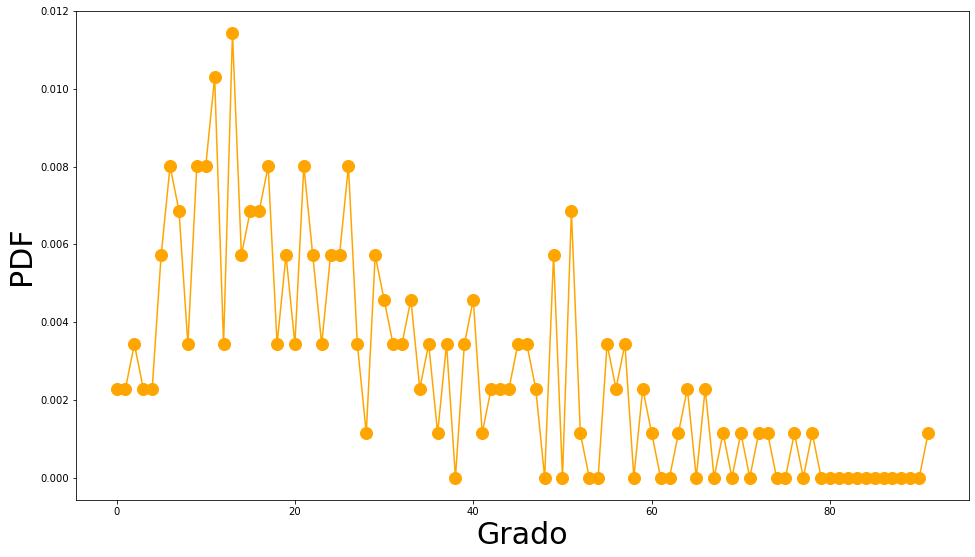

In [159]:
fig = plt.figure(figsize=(16,9))
assi = fig.gca()
assi.plot(bins_grado[:-1],pdf_grado, color='orange',marker='o', linestyle='-', ms=12)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('PDF',size=30)

Text(0, 0.5, 'CDF $P(X\\leq x)$')

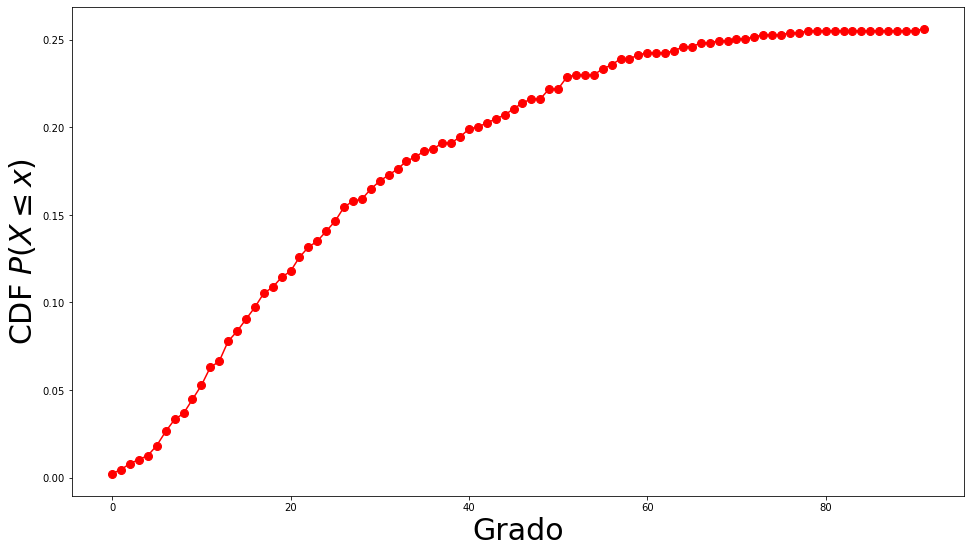

In [160]:
cdf_grado=np.cumsum(pdf_grado)
fig_cdf_grado = plt.figure(figsize=(16,9))
assi = fig_cdf_grado.gca()
assi.plot(bins_grado[:-1], cdf_grado, color = 'red', marker = 'o', linestyle = '-', ms = 8)
assi.set_xlabel('Grado',size=30)
assi.set_ylabel('CDF $P(X\leq x)$',size=30)

In [161]:
nx.is_connected(grafo2)

False

In [162]:
nx.number_connected_components(grafo2)

3

In [165]:
connected_components=[c for c in nx.connected_components(grafo2)]
max_connected_component=max(connected_components, key=len)
print(len(connected_components[2]))

1


In [166]:
nodi={}
for nodo in grafo2.nodes():
    nodi[nodo]=grafo2.degree(nodo)
    
nodi = dict(sorted(nodi.items(), key=lambda x:x[1],reverse=True))
print(nodi)

{'2231': 91, '1245': 78, '74568': 76, '73457': 73, '17605': 72, '16851': 70, '16828': 68, '17604': 66, '15277': 66, '12835': 64, '543530': 64, '71580': 63, '3223': 60, '543261': 59, '524': 59, '81685': 57, '8691': 57, '53650': 57, '1896': 56, '71189': 56, '91606': 55, '62561': 55, '3063': 55, '3896': 52, '22226': 51, '60898': 51, '1892': 51, '1136406': 51, '139820': 51, '1121': 51, '39459': 49, '880': 49, '3141': 49, '1160': 49, '236696': 49, '1817': 47, '62105': 47, '62': 46, '18999': 46, '934': 46, '5293': 45, '550843': 45, '60073': 45, '9195': 44, '64': 44, '17832': 43, '1333': 43, '172069': 42, '2975': 42, '192': 41, '117642': 40, '9273': 40, '19034': 40, '4785': 40, '16483': 39, '3894': 39, '132157': 39, '4173': 37, '11181': 37, '11207': 37, '32': 36, '90633': 35, '4783': 35, '27428': 35, '8289': 34, '56614': 34, '131': 33, '1372': 33, '12132': 33, '5916': 33, '73968': 32, '16940': 32, '15762': 32, '7499': 31, '1229': 31, '335': 31, '35029': 30, '7497': 30, '74242': 30, '3895': 30

In [85]:
r = nx.degree_assortativity_coefficient(grafo)
print(r)

0.12350485649157876


In [138]:
print(nx.numeric_assortativity_coefficient(grafo, "popolarità"))

0.010095334372752755


In [87]:
r = nx.degree_pearson_correlation_coefficient(grafo)
print(r)

0.12350485649157938


<h3> Inizio misure sul secondo grafo</h3>

In [212]:
nodi2={}
for nodo in grafo2.nodes():
    nodi2[nodo]=grafo2.degree(nodo)
    
nodi2 = dict(sorted(nodi2.items(), key=lambda x:x[1],reverse=True))
print(nodi2)

{'2231': 91, '1245': 78, '74568': 76, '73457': 73, '17605': 72, '16851': 70, '16828': 68, '17604': 66, '15277': 66, '12835': 64, '543530': 64, '71580': 63, '3223': 60, '543261': 59, '524': 59, '81685': 57, '8691': 57, '53650': 57, '1896': 56, '71189': 56, '91606': 55, '62561': 55, '3063': 55, '3896': 52, '22226': 51, '60898': 51, '1892': 51, '1136406': 51, '139820': 51, '1121': 51, '39459': 49, '880': 49, '3141': 49, '1160': 49, '236696': 49, '1817': 47, '62105': 47, '62': 46, '18999': 46, '934': 46, '5293': 45, '550843': 45, '60073': 45, '9195': 44, '64': 44, '17832': 43, '1333': 43, '172069': 42, '2975': 42, '192': 41, '117642': 40, '9273': 40, '19034': 40, '4785': 40, '16483': 39, '3894': 39, '132157': 39, '4173': 37, '11181': 37, '11207': 37, '32': 36, '90633': 35, '4783': 35, '27428': 35, '8289': 34, '56614': 34, '131': 33, '1372': 33, '12132': 33, '5916': 33, '73968': 32, '16940': 32, '15762': 32, '7499': 31, '1229': 31, '335': 31, '35029': 30, '7497': 30, '74242': 30, '3895': 30

In [213]:
list(grafo2.nodes(data=True))

[('1245', {'tipo': 420}),
 ('1373737', {'tipo': 420}),
 ('12835', {'tipo': 420}),
 ('91606', {'tipo': 420}),
 ('10859', {'tipo': 420}),
 ('73968', {'tipo': 429}),
 ('3293', {'tipo': 429}),
 ('62', {'tipo': 429}),
 ('2963', {'tipo': 420}),
 ('505710', {'tipo': 420}),
 ('3896', {'tipo': 429}),
 ('18182', {'tipo': 420}),
 ('1100', {'tipo': 429}),
 ('73457', {'tipo': 420}),
 ('543261', {'tipo': 420}),
 ('3223', {'tipo': 420}),
 ('6384', {'tipo': 429}),
 ('2231', {'tipo': 420}),
 ('234352', {'tipo': 429}),
 ('63312', {'tipo': 429}),
 ('17271', {'tipo': 429}),
 ('117642', {'tipo': 429}),
 ('9195', {'tipo': 420}),
 ('17832', {'tipo': 429}),
 ('22226', {'tipo': 420}),
 ('90633', {'tipo': 429}),
 ('60898', {'tipo': 420}),
 ('16644', {'tipo': 429}),
 ('71580', {'tipo': 420}),
 ('7499', {'tipo': 429}),
 ('543530', {'tipo': 420}),
 ('35029', {'tipo': 420}),
 ('1892', {'tipo': 420}),
 ('74568', {'tipo': 420}),
 ('16483', {'tipo': 429}),
 ('6161', {'tipo': 420}),
 ('2037', {'tipo': 429}),
 ('81685',

In [167]:
r = nx.degree_assortativity_coefficient(grafo2)
print(r)

0.2248270634747548


In [169]:
eigenvector_centrality=nx.eigenvector_centrality(grafo2, weight='weight')
max_centrality_nodes = sorted(eigenvector_centrality.items(),key= lambda x:x[1], reverse=True)
print(max_centrality_nodes)


[('2231', 0.2633440406969388), ('16828', 0.26238537998070327), ('1245', 0.25696299463213584), ('3223', 0.23258987829965616), ('74568', 0.22538723787330434), ('53650', 0.20681470660635698), ('91606', 0.1840745913100346), ('60898', 0.18171487520169893), ('73457', 0.1793525081194824), ('1896', 0.17814520569153733), ('17604', 0.1766775315419329), ('550843', 0.1757881384759247), ('71189', 0.1715777959235751), ('12835', 0.171050105949325), ('62105', 0.15774955121703801), ('1136406', 0.15128553450110555), ('16851', 0.15120118449095576), ('39459', 0.14586576417388497), ('543530', 0.14517841160650177), ('543261', 0.14419070924635355), ('8691', 0.13751812616756492), ('71580', 0.13476412301938184), ('139820', 0.13452564617677792), ('15277', 0.13393067193216127), ('17605', 0.12405037161416696), ('172069', 0.12294777206156135), ('236696', 0.12002382878937023), ('524', 0.10778182074077898), ('81685', 0.1056822378215331), ('3141', 0.104272721286527), ('22226', 0.09229738687618633), ('62561', 0.085944

In [170]:
print(nx.numeric_assortativity_coefficient(grafo2, "tipo"))

0.4482244751296764


In [172]:
betweenness_centrality=nx.betweenness_centrality(grafo2, k=None, normalized=True, weight='weight', endpoints=False, seed=None)
max_betweenness_centrality_nodes=sorted(betweenness_centrality.items(), key= lambda x:x[1], reverse=True)
print(max_betweenness_centrality_nodes)

[('15762', 0.040213457620942264), ('3896', 0.023915282622848148), ('192', 0.023505880764347058), ('1245', 0.022563178506695255), ('2231', 0.022419454835195175), ('17605', 0.02222150650146557), ('2975', 0.02060736495164582), ('15277', 0.020434606327752153), ('81685', 0.02022074536865417), ('1121', 0.018120312665231376), ('62', 0.017800453436326396), ('16828', 0.01700888183301941), ('5293', 0.01621942230338788), ('1160', 0.015532695738416306), ('64', 0.015140691779126697), ('17604', 0.01496419587096074), ('73457', 0.014810069769103025), ('1333', 0.014524335905808565), ('7497', 0.013436942848865084), ('3063', 0.013280825545161723), ('1892', 0.01307691268337181), ('9195', 0.013021139867821873), ('934', 0.012979157100537824), ('2983', 0.012421831219462746), ('1229', 0.012352348817932355), ('74568', 0.012231357386055923), ('17051', 0.012125985556610135), ('16851', 0.01203870969325623), ('524', 0.011809332732181687), ('880', 0.011599635017680077), ('17832', 0.011251975926260137), ('5916', 0.0

In [173]:
closeness_centrality=nx.closeness_centrality(grafo2, u=None, distance='weight', wf_improved=True)
max_closeness_centrality_nodes=sorted(closeness_centrality.items(), key= lambda x:x[1], reverse=True)
print(max_closeness_centrality_nodes)

[('17605', 1.055508131179426), ('15277', 1.0529708520179373), ('9195', 1.0479327139700045), ('1160', 1.0479327139700045), ('1121', 1.033103477451561), ('1245', 1.0306726457399102), ('2231', 1.0258451392024868), ('62', 1.0234483047650977), ('3896', 1.0234483047650977), ('73457', 1.02106264438103), ('81685', 1.02106264438103), ('192', 1.02106264438103), ('16851', 1.02106264438103), ('3063', 1.02106264438103), ('1892', 1.0186880800917717), ('74568', 1.0139719315728284), ('524', 1.0139719315728284), ('934', 1.0139719315728284), ('62561', 1.0139719315728284), ('71580', 1.0046694367877567), ('543530', 1.0046694367877567), ('5293', 1.0046694367877567), ('17604', 1.0023704220582652), ('64', 1.0000819051129268), ('60073', 1.0000819051129268), ('74242', 0.9978038142128973), ('22226', 0.9955360782715044), ('2975', 0.9910313901345291), ('8691', 0.9887942989604106), ('6161', 0.9865672847735628), ('131', 0.9865672847735628), ('1817', 0.9865672847735628), ('11705', 0.9865672847735628), ('4173', 0.984

In [215]:
def jaccard(node1, node2):
    totale_nodi=[]
    
    #numeratore
    vicini_node1=list(grafo2[node1].keys())
    vicini_node2=list(grafo2[node2].keys())
    nodi_comuni=list(set(vicini_node1) & set(vicini_node2))
    
    #denominatore
    for nodo in vicini_node1:
        if(nodo not in totale_nodi):
            totale_nodi.append(nodo)
            
    for nodo in vicini_node2:
        if(nodo not in totale_nodi):
            totale_nodi.append(nodo)
            
    return len(nodi_comuni)/len(totale_nodi)

In [221]:
def cosine(node1, node2):
    
    #numeratore
    vicini_node1=list(grafo2[node1].keys())
    vicini_node2=list(grafo2[node2].keys())
    nodi_comuni=list(set(vicini_node1) & set(vicini_node2))
    
    #denominatore
    totale_nodi=(len(vicini_node1)*len(vicini_node2))**(1/2)
    
    return len(nodi_comuni)/totale_nodi

In [218]:
print(jaccard("3896", "2231"))

0.20168067226890757


In [226]:
print(cosine("3896", "2231"))

0.3488902827777482


In [227]:
import community as cm
grafo_comm = cm.best_partition(grafo)
for n, com in grafo_comm.items():
    grafo.nodes[n]['community']=com
nx.write_gexf(grafo,'graph_totale.gexf')


In [228]:
import community as cm
grafo_comm = cm.best_partition(grafo2)
for n, com in grafo_comm.items():
    grafo.nodes[n]['community']=com
nx.write_gexf(grafo,'graph_parziale.gexf')

KeyError: '1245'